In [8]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.max_columns = 10

In [9]:
training_df=pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

training_df["median_house_value"]/=1000.0

training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


In [10]:
training_df.describe()
# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the 
# max value of total_rooms to be approximately 
# 5,000 or possibly 10,000. However, the max value 
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror 
# anomalies in the label, which could make the column 
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you 
# might be able to represent (pre-process) raw data 
# in order to make columns into useful features.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [11]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [12]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 0s 498us/step - loss: 86654.9062 - root_mean_squared_error: 294.3720
Epoch 2/30
567/567 [==============================] - 0s 478us/step - loss: 27873.1641 - root_mean_squared_error: 166.9526
Epoch 3/30
567/567 [==============================] - 0s 460us/step - loss: 26952.1738 - root_mean_squared_error: 164.1712
Epoch 4/30
567/567 [==============================] - 0s 457us/step - loss: 26192.0645 - root_mean_squared_error: 161.8396
Epoch 5/30
567/567 [==============================] - 0s 456us/step - loss: 25572.3418 - root_mean_squared_error: 159.9135
Epoch 6/30
567/567 [==============================] - 0s 466us/step - loss: 24726.7734 - root_mean_squared_error: 157.2475
Epoch 7/30
567/567 [==============================] - 0s 540us/step - loss: 24160.9121 - root_mean_squared_error: 155.4378
Epoch 8/30
567/567 [==============================] - 0s 474us/step - loss: 23400.3496 - root_mean_squared_error: 152.9717
Epoch 9/30
567/5

/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


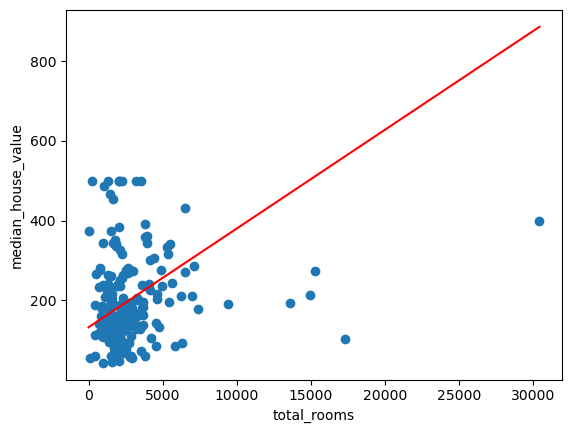

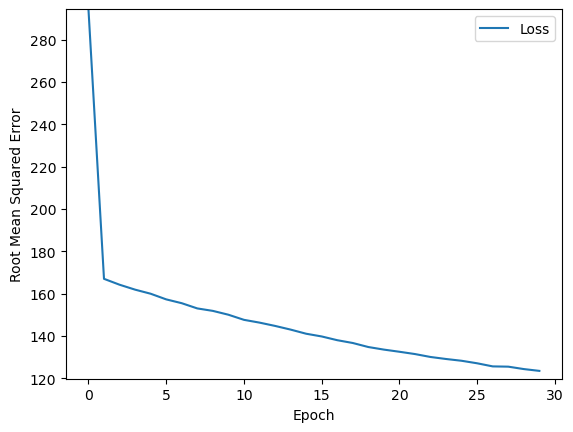

In [13]:
learning_rate=0.01
epochs=30
batch_size=30

my_feature="total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [15]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [18]:
predict_house_values(10, my_feature, my_label)
# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of 
# the rest of the examples.  So, let's make a better

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             181
 3400     92             217
 3677     69             223
 2202     62             187
 2403     80             192
 5652    295             272
 3318    500             215
 2552    342             196
 1364    118             166
 3468    128             218


Epoch 1/18
5667/5667 [==============================] - 3s 470us/step - loss: 31381.8652 - root_mean_squared_error: 177.1493
Epoch 2/18
5667/5667 [==============================] - 3s 472us/step - loss: 19698.4180 - root_mean_squared_error: 140.3511
Epoch 3/18
5667/5667 [==============================] - 3s 461us/step - loss: 18294.7285 - root_mean_squared_error: 135.2580
Epoch 4/18
5667/5667 [==============================] - 3s 464us/step - loss: 18159.5273 - root_mean_squared_error: 134.7573
Epoch 5/18
5667/5667 [==============================] - 3s 464us/step - loss: 18146.7148 - root_mean_squared_error: 134.7097
Epoch 6/18
5667/5667 [==============================] - 3s 459us/step - loss: 18091.7871 - root_mean_squared_error: 134.5057
Epoch 7/18
5667/5667 [==============================] - 3s 467us/step - loss: 18211.9824 - root_mean_squared_error: 134.9518
Epoch 8/18
5667/5667 [==============================] - 3s 481us/step - loss: 18137.1875 - root_mean_squared_error: 134.6744


/home/franksitawa/anaconda3/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


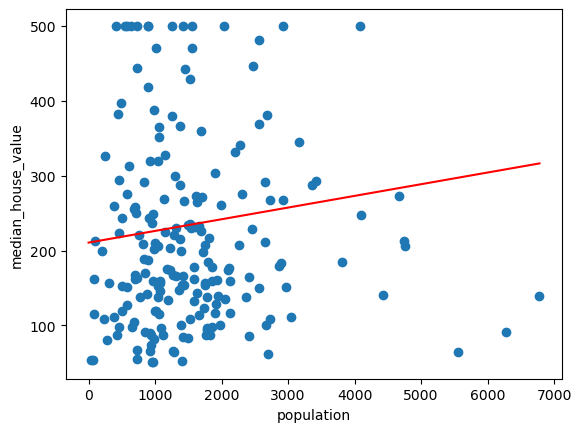

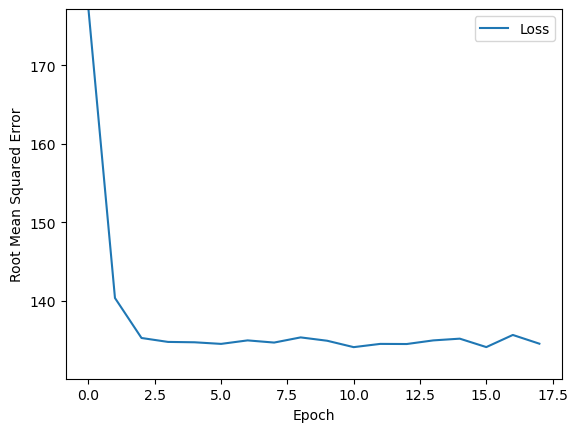

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1286     53             231
 1867     92             240
 2191     69             245
 1052     62             227
 1647     80             236
 2312    295             247
 1604    500             236
 1066    342             227
  338    118             216
 1604    128             236
 1200    187             229
  292     80             215
 2014    112             242
 1817     95             239
 1328     69             231


In [21]:
my_feature = "population"   
# Experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/24
567/567 [==============================] - 0s 475us/step - loss: 38991.5703 - root_mean_squared_error: 197.4628
Epoch 2/24
567/567 [==============================] - 0s 525us/step - loss: 19322.5020 - root_mean_squared_error: 139.0054
Epoch 3/24
567/567 [==============================] - 0s 464us/step - loss: 15077.3955 - root_mean_squared_error: 122.7900
Epoch 4/24
567/567 [==============================] - 0s 470us/step - loss: 14775.6260 - root_mean_squared_error: 121.5550
Epoch 5/24
567/567 [==============================] - 0s 465us/step - loss: 14607.7275 - root_mean_squared_error: 120.8624
Epoch 6/24
567/567 [==============================] - 0s 469us/step - loss: 14443.5391 - root_mean_squared_error: 120.1813
Epoch 7/24
567/567 [==============================] - 0s 502us/step - loss: 14265.7871 - root_mean_squared_error: 119.4395
Epoch 8/24
567/567 [==============================] - 0s 457us/step - loss: 14109.3115 - root_mean_squared_error: 118.7826
Epoch 9/24
567/5

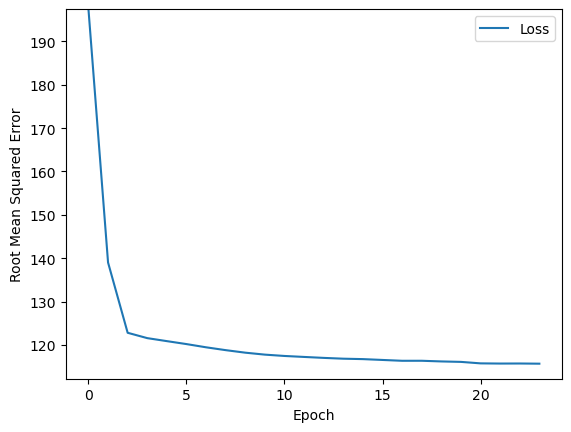

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             195
    2     62             211
    1     80             186
    2    295             225
    2    500             210
    2    342             223
    4    118             287
    2    128             214
    2    187             224
    3     80             234
    2    112             224
    2     95             219
    2     69             210


In [23]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [24]:
training_df.corr()
# The median_income correlates 0.7 with the label 
# (median_house_value), so median_income might be a 
# good feature. The other seven potential features
# all have a correlation relatively close to 0. 

# If time permits, try median_income as the feature
# and see whether the model improves

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,-0.077773
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,0.143017
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.103655
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.121001
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.047811
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,-0.140277
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,-0.034049
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.232667
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.206969
rooms_per_person,-0.077773,0.143017,-0.103655,0.121001,0.047811,-0.140277,-0.034049,0.232667,0.206969,1.000000


Epoch 1/24
567/567 [==============================] - 0s 476us/step - loss: 38217.9375 - root_mean_squared_error: 195.4941
Epoch 2/24
567/567 [==============================] - 0s 495us/step - loss: 19108.2227 - root_mean_squared_error: 138.2325
Epoch 3/24
567/567 [==============================] - 0s 481us/step - loss: 15127.8203 - root_mean_squared_error: 122.9952
Epoch 4/24
567/567 [==============================] - 0s 466us/step - loss: 14822.3330 - root_mean_squared_error: 121.7470
Epoch 5/24
567/567 [==============================] - 0s 482us/step - loss: 14588.6436 - root_mean_squared_error: 120.7835
Epoch 6/24
567/567 [==============================] - 0s 478us/step - loss: 14445.7549 - root_mean_squared_error: 120.1905
Epoch 7/24
567/567 [==============================] - 0s 499us/step - loss: 14300.2031 - root_mean_squared_error: 119.5835
Epoch 8/24
567/567 [==============================] - 0s 524us/step - loss: 14185.3584 - root_mean_squared_error: 119.1023
Epoch 9/24
567/5

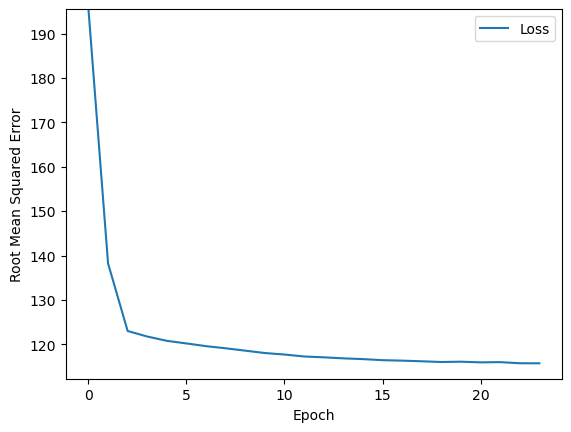

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             187
    2     92             199
    2     69             194
    2     62             210
    1     80             185
    2    295             224
    2    500             209
    2    342             222
    4    118             286
    2    128             213
    2    187             223
    3     80             233
    2    112             223
    2     95             218
    2     69             209


In [25]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 24
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)